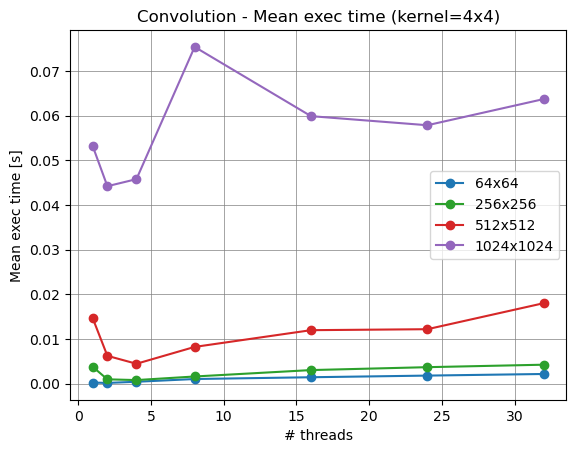

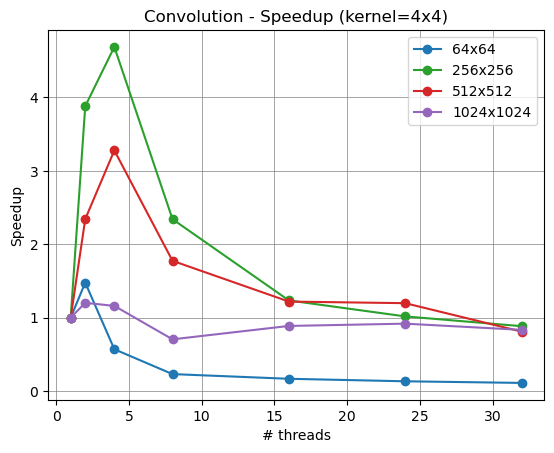

In [14]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl 
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# compute confidence interval with Student's T distribuition
# before computing anything check if RV are normal and iid
def compute_ci_student_t (data,alpha = 0.95): 
    # number of degrees of freedom of the sample
    degrees = len(data)-1
    # sample mean
    mean = np.mean(data)
    # std error = sample_std/sqrt(n)    
    sem = st.sem(data)
    return st.t.interval(alpha,degrees,mean,sem)

path     = 'csv/pthread'
image    = ['64','256','512','1024']
image_   = [64,256,512,1024]
threads  = ['1','2','4','8','16','24','32']
threads_ = [1,2,4,8,16,24,32]
csv_name = 'exec_times'
colors   = ['tab:blue','tab:green','tab:red','tab:purple','deepskyblue','tab:orange','tab:olive','m','springgreen','salmon','paleturquoise','orchid','dodgerblue','yellow','turquoise','royalblue','tomato','chartreuse']

mean_exec_time      = [[], [], [], [], [], []]
#confidence_interval = [[], [], [], [], [], []]
speedup             = [[], [], [], [], [], []]

def main():
    
    # start 'for l in range(0,len(image_)):'
    for l in range(0,len(image_)):
        
        # start 'for r in range(0,len(threads_)):'
        for r in range(0,len(threads_)):

            # parse csv
            #print('Parsing ' + str(path) + '/' + csv_name + '(' + str(image[l]) + 'x' + str(image[l]) + '_4x4)(' + str(threads[r]) + ').csv ...')
            raw = pd.read_csv(str(path) + '/' + csv_name + '(' + str(image[l]) + 'x' + str(image[l]) + '_4x4)(' + str(threads[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time[l].append(np.mean(exec_times))
            speedup[l].append(mean_exec_time[l][0]/np.mean(exec_times))
            interval = compute_ci_student_t(exec_times)
            #confidence_interval[l].append(interval[1] - interval[0])
        # end 'for r in range(0,len(rate)):'
        
        #plt.errorbar(x=threads_,y=mean_exec_time[l],xerr=None,yerr=confidence_interval[l],marker='o',color=colors[l],capsize=3.5,barsabove=True,label=image[l]+'x'+image[l])
        plt.plot(threads_,mean_exec_time[l],marker='o',color=colors[l],label=image[l]+'x'+image[l])
    # end 'for l in range(0,len(image_)):'
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Convolution - Mean exec time (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('./plots/mean_exec_time(4x4).png', bbox_inches='tight')
    plt.show()
    
    # start 'for l in range(0,len(image_)):'
    for l in range(0,len(image_)):
        
        plt.plot(threads_,speedup[l],color=colors[l],marker='o',label=image[l]+'x'+image[l])
        
    # end 'for l in range(0,len(image_)):'
        
    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Convolution - Speedup (kernel=4x4)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('./plots/speedup(4x4).png', bbox_inches='tight')
    plt.show()
    
if __name__ == '__main__':
    main()